[Table of Contents](table_of_contents.ipynb)

# Topic 4.  Linear Independence

Author: Zheng Sun (zsun2@byu.edu)

Editor: Jen Jui Liu (re1983@byu.edu)

##  Introduction

A subset of a vector space is **linearly independent** if none of its elements can be written as a *linear combination* of the others.

For example, a 3D Euclidean space $R^3$ three vectors $(1, 0, 0)$, $(0, 1, 0)$, and $(0, 0, 1)$ are **linearly independent** but $(2, −1, 1)$, $(1, 0, 1)$, and $(3, −1, 2)$ are **linearly dependent**. Because $(3, −1, 2)$ is the sum of $(2, −1, 1)$, $(1, 0, 1)$.

Together with *linear combination*, *spanning*, and *basis*, **linear independence** is a fundamental concept in *vector spaces* theory.

The following YouTube could help us to review these concepts.

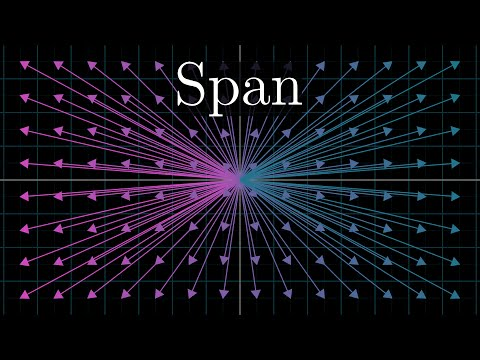

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k7RM-ot2NWY')

## Explanation of the theory

### Definition

Let $S$ be a vector space, and let $T$ be a subset of $S$. The set $T$ is **linearly independent** if for each finite nonempty subset of $T$ (say $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$) the only set of scalars satisfying the equation

$$c_1\mathbf{p}_1 + c_2\mathbf{p}_2 + \cdots + c_m\mathbf{p}_m = 0$$

is the trivial solution $c_1 = c_2 = \cdots = c_m = 0$.


The set of vectors $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$ is said to be **linearly dependent** if there exists a set of scalar coefficients $\{c_1, c_2, \cdots, c_m\}$ which are not all zero, such that $c_1\mathbf{p}_1 + c_2\mathbf{p}_2 + \cdots + c_m\mathbf{p}_m = 0$.

Note that linear dependence/independence is a concept that applies to a collection of vectors, not to a single vector, or to one vector in the presence of some others.

### Matrix notation

The set of vectors $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$ is linearly independent if and only if the matrix $\mathbf{A}$ with columns $\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m$ has a pivot in every column, if and only if $\mathbf{Ac} = 0$ has only the trivial solution ($\mathbf{c} = [c_1, c_2, \cdots, c_m]^T$).

Solving the matrix equation $\mathbf{Ac} = 0$ will either verify that the columns $\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m$ are linearly independent, or produce a linear dependence relation by substituting any nonzero values for the free variables.

### Other facts

- Any set containing the zero vector is linearly dependent.

- Two vectors are linearly dependent if and only if they are collinear.

- A set of vectors $\{\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m\}$ is linearly independent if and only if the rank of the matrix $\mathbf{A}$ with columns $\mathbf{p}_1, \mathbf{p}_2, \cdots, \mathbf{p}_m$ is $m$.

### Supplemental Video

The following YouTube could help us to better understand linearly dependent.

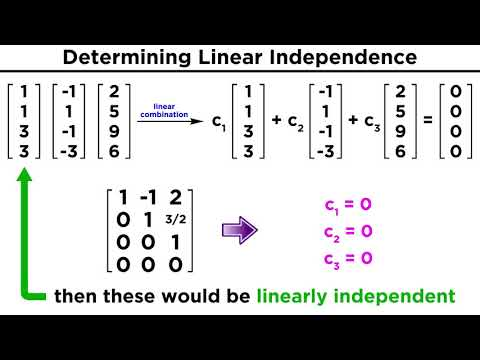

In [2]:
YouTubeVideo('9kDpbZCK62Y')

## Simple Numerical Examples

In [3]:
# Import modules for linear algebra
import numpy as np
import sympy
sympy.init_printing()

### Example 1

Is the set of vectors $\begin{Bmatrix}\begin{pmatrix}1\\2\end{pmatrix}, \begin{pmatrix}3\\4\end{pmatrix}\end{Bmatrix}$ linearly independent?

Firstly, we form a matrix equation:

$$\begin{bmatrix}1&3\\2&4\end{bmatrix}\begin{bmatrix}c_1\\c_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$$

It implies that $\begin{cases}{c_1 + 3c_2 = 0\\2c_1 + 4c_2 = 0}\end{cases}$.

As this simultaneous equation has no nonzero solution, $\begin{Bmatrix}\begin{pmatrix}1\\2\end{pmatrix}, \begin{pmatrix}3\\4\end{pmatrix}\end{Bmatrix}$ is linearly independent.

### Example 2

Is the set of vectors $\begin{Bmatrix}\begin{pmatrix}1\\2\\3\end{pmatrix}, \begin{pmatrix}2\\4\\6\end{pmatrix}\end{Bmatrix}$ linearly independent?

The matrix equation is:

$$\begin{bmatrix}1&2\\2&4\\3&6\end{bmatrix}\begin{bmatrix}c_1\\c_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$$

We can try solving this equation, like what we do in last example. Also, we can use *Gaussian elimination* (also known as *row reduction*) to find the rank of matrix $\begin{bmatrix}1&2\\2&4\\3&6\end{bmatrix}$ ($\mathbf{A}$).

For simplicity, we do not implement *Gaussian elimination* from scratch here, just use an inner method `rref()` in SymPy `Matrix` object. `rref()` returns a tuple of two elements, the first is the reduced row echelon form (RREF), and the second is a tuple of indices of the pivot columns.

In [4]:
A = sympy.Matrix([[1,2], [2,4], [3,6]])
rref, idx = A.rref()

print("Rank of A = {}".format(len(idx)))
print("RREF of A = ")
display(rref)

Rank of A = 1
RREF of A = 


⎡1  2⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

As the result shows, the rank of $\mathbf{A}$ is 1, less than 2, the number of columns. Therefore, $\begin{Bmatrix}\begin{pmatrix}1\\2\\3\end{pmatrix}, \begin{pmatrix}2\\4\\6\end{pmatrix}\end{Bmatrix}$ is linearly dependent.

### Example 3

Is the set of vectors $\begin{Bmatrix}\begin{pmatrix}1\\1\\-2\end{pmatrix}, \begin{pmatrix}1\\-1\\2\end{pmatrix}, \begin{pmatrix}3\\1\\4\end{pmatrix}\end{Bmatrix}$ linearly independent?

The matrix $\mathbf{A}$ is $\begin{bmatrix}1&1&3\\1&-1&1\\-2&2&4\end{bmatrix}$. Just do *Gaussian elimination* on $\mathbf{A}$.

In [5]:
A = sympy.Matrix([[1,1,3], [1,-1,1], [-2,2,4]])
rref, idx = A.rref()

print("Rank of A = {}".format(len(idx)))
print("RREF of A = ")
display(rref)

Rank of A = 3
RREF of A = 


⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

It shows that, the rank of $\mathbf{A}$ is 3, equal to the number of columns. Therefore, $\begin{Bmatrix}\begin{pmatrix}1\\1\\-2\end{pmatrix}, \begin{pmatrix}1\\-1\\2\end{pmatrix}, \begin{pmatrix}3\\1\\4\end{pmatrix}\end{Bmatrix}$ is linearly independent.

### Example 4

Given the set $\begin{Bmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}, \begin{pmatrix}0\\1\\0\\0\end{pmatrix}, \begin{pmatrix}0\\0\\1\\0\end{pmatrix}, \begin{pmatrix}0\\0\\0\\1\end{pmatrix}, \begin{pmatrix}1\\0\\1\\1\end{pmatrix}\end{Bmatrix}$
of vectors in the vector space $R^4$, determine whether $S$ is linearly independent or linearly dependent.

**Step 1: Set up a homogeneous system of equations**

The set S = {$V_1$, $V_2$, $V_3$, $V_4$, $V_5$} of vectors in $R^4$ is linearly independent if the only solution of

$(*)$ $c_1\mathbf{V}_1 + c_2\mathbf{V}_2 + c_3\mathbf{V}_3 + c_4\mathbf{V}_4 + c_5\mathbf{V}_5= 0$

is $c_1$, $c_2$, $c_3$, $c_4$, $c_5$ = 0


Otherwise (i.e., if a solution with at least some nonzero values exists), $S$ is linearly dependent.

With our vectors $V_1$, $V_2$, $V_3$, $V_4$, $V_5$, $(*)$ becomes:

$c_1\begin{pmatrix}1\\0\\0\\0\end{pmatrix}+ c_2\begin{pmatrix}0\\1\\0\\0\end{pmatrix}+ c_3\begin{pmatrix}0\\0\\1\\0\end{pmatrix}+ c_4\begin{pmatrix}0\\0\\0\\1\end{pmatrix}+ c_5\begin{pmatrix}1\\0\\1\\1\end{pmatrix} = \begin{pmatrix}0\\0\\0\\0\end{pmatrix}$

Rearranging the left hand side yields

$\begin{pmatrix}1 c_1	 +0 c_2	 +0 c_3	 +0 c_4	 +1 c_5
\\0 c_1	 +1 c_2	 +0 c_3	 +0 c_4	 +0 c_5
\\0 c_1	 +0 c_2	 +1 c_3	 +0 c_4	 +1 c_5
\\0 c_1	 +0 c_2	 +0 c_3	 +1 c_4	 +1 c_5
\end{pmatrix} = \begin{pmatrix}0\\0\\0\\0\end{pmatrix}$


The matrix equation above is equivalent to the following homogeneous system of equations $(**)$
   	
$1 c_1	 +0 c_2	 +0 c_3	 +0 c_4	 +1 c_5	=	0$

$0 c_1	 +1 c_2	 +0 c_3	 +0 c_4	 +0 c_5	=	0$

$0 c_1	 +0 c_2	 +1 c_3	 +0 c_4	 +1 c_5	=	0$

$0 c_1	 +0 c_2	 +0 c_3	 +1 c_4	 +1 c_5	=	0$





**Step 2: Transform the coefficient matrix of the system to the reduced row echelon form**

We now transform the coefficient matrix of the homogeneous system above to the reduced row echelon form to determine whether the system has

the trivial solution only (meaning that S is linearly independent), or the trivial solution as well as nontrivial ones (S is linearly dependent).

$\begin{pmatrix} 1 0 0 0 1\\ 0 1 0 0 0\\ 0 0 1 0 1\\ 0 0 0 1 1 \end{pmatrix}$

Matrix is already in the reduced row echelon form.

**Step 3: Interpret the reduced row echelon form**

The reduced row echelon form of the coefficient matrix of the homogeneous system $(**)$ is

$\begin{pmatrix} 1 0 0 0 1\\ 0 1 0 0 0\\ 0 0 1 0 1\\ 0 0 0 1 1 \end{pmatrix}$
 
which corresponds to the system

$1 c1	 	 	 	 +1 c5	=	0$

$ 	1 c2	 	 	 	=	0$

$ 	 	1 c3	 	 +1 c5	=	0$

$ 	 	 	1 c4	 +1 c5	=	0$

The leading entries have been highlighted in yellow.

Since some columns do not contain leading entries, then the system has nontrivial solutions, so that some of the values c1, c2, c3, c4, c5 solving (*) may be nonzero.

Therefore the set $S = \{V_1, V_2, V_3, V_4, V_5\}$ is linearly dependent.

**Comments**

Shortcut: The dimension of the space $R^4$ is $4$, therefore only a set containing $4$ or fewer vectors can possibly be linearly independent. Since the set S has $5$ vectors in it, it must be linearly dependent.

The pattern of leading entries can usually be determined before the reduced row echelon form is obtained (for example, a matrix in row echelon form is sufficient for this purpose). This is especially important when solving a problem like this by hand.


### Example 5

m=3, n=2 : 3 equations and 2 unknowns

$A_{1,1} x_1 + A_{1,2} x_2 = b_1$

$A_{2,1}x_1+A_{2,2}x_2=b_2$

$A_{3,1}x_1+A_{3,2}x_2=b_3$

example we have the following 3 equations:

$y=2x+1$

$y=6x−2$

$y=1/10x+6$


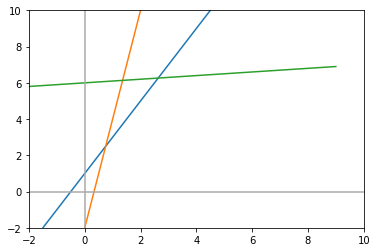

In [12]:
import matplotlib.pyplot as plt
x = np.arange(-10, 10)
y = 2*x + 1

y1 = 6*x - 2
y2 = 0.1*x+6

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

In the above case, there is 3 equations and no solution because there is no point in space that is on each of these lines.

## An Engineering Application

Let us look at a chemical engineering application.

> The following reactions are proposed in the hydrogenation of bromine:
> 
> $$\begin{align*}H_2 + Br_2 &\rightleftharpoons 2HBr\\
Br_2 &\rightleftharpoons 2Br\\
Br + H_2 &\rightleftharpoons HBr + H\\
H + Br_2 &\rightleftharpoons HBr + Br\\
H + HBr &\rightleftharpoons H_2 + Br\\
2Br &\rightleftharpoons Br_2\end{align*}$$
> 
> We can find out a set of independent reactions from these reactions.

Firstly, we create a species vector $\mathbf{c} = [H_2, H, Br_2, Br, HBr]^T$, and a stoichiometric coefficients matrix $\mathbf{A}$. Each row in $\mathbf{A}$ represents a reaction with negative coefficients for reactants, and positive coefficients for products. A coefficient of zero denotes species not participating in the reaction. Then, 6 given reactions can be represented by $\mathbf{A}*\mathbf{c}$.

In [6]:
labels = ['H2', 'H', 'Br2', 'Br', 'HBr']

#    {H2, H, Br2, Br, HBr}
A = [[-1,  0, -1,  0,  2],  # H2 + Br2 = 2HBr
     [ 0,  0, -1,  2,  0],  # Br2 = 2Br
     [-1,  1,  0, -1,  1],  # Br + H2 = HBr + H
     [ 0, -1, -1,  1,  1],  # H + Br2 = HBr + Br
     [ 1, -1,  0,  1,  -1], # H + HBr = H2 + Br
     [ 0,  0,  1, -2,  0]]  # 2Br = Br2

# convert A to Matrix object
A = sympy.Matrix(A)

print("A = ")
display(A)

A = 


⎡-1  0   -1  0   2 ⎤
⎢                  ⎥
⎢0   0   -1  2   0 ⎥
⎢                  ⎥
⎢-1  1   0   -1  1 ⎥
⎢                  ⎥
⎢0   -1  -1  1   1 ⎥
⎢                  ⎥
⎢1   -1  0   1   -1⎥
⎢                  ⎥
⎣0   0   1   -2  0 ⎦

As we know, there are three types of elementary row operations for *Gaussian elimination*:

* Swapping two rows
* Multiplying a row by a nonzero number
* Adding a multiple of one row to another row

For a stoichiometric coefficients matrix, these operations are all reasonable. Let us do *Gaussian elimination* on $\mathbf{A}$.

In [7]:
# Put A into RREF
rref, idx = A.rref()

print("RREF of A = ")
display(rref)

RREF of A = 


⎡1  0  0  2   -2⎤
⎢               ⎥
⎢0  1  0  1   -1⎥
⎢               ⎥
⎢0  0  1  -2  0 ⎥
⎢               ⎥
⎢0  0  0  0   0 ⎥
⎢               ⎥
⎢0  0  0  0   0 ⎥
⎢               ⎥
⎣0  0  0  0   0 ⎦

The RREF matrix $\mathbf{A}_{RREF}$ shows that there are only 3 independent columns. The independent reactions are defined by $\mathbf{A}_{RREF}*\mathbf{c}$.

In [8]:
# Find out independent reactions
for row in rref.tolist():
    
    s = "0 = "
    for coeff, species in zip(row, labels):
        if coeff != 0:
            s += "{0:+d}{1} ".format(int(coeff), species)
    
    if len(s) != 4:
        print(s)

0 = +1H2 +2Br -2HBr 
0 = +1H +1Br -1HBr 
0 = +1Br2 -2Br 


It is done! But the answer is not unique, the order of rows and elementary row operations can change it.

## Homework 

Consider the three vectors below:

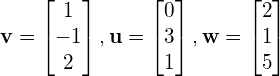

The above set is linearly dependent. Why? It is simple. Because $\mathbf{w} = 2\mathbf{v} + \mathbf{u}$. Let’s do the above with Python and Numpy:

## References

1. Moon, Todd K., and Wynn C. Stirling. Mathematical methods and algorithms for signal processing. No. 621.39: 51 MON. 2000.

2. https://en.wikipedia.org/wiki/Linear_independence

3. https://en.wikipedia.org/wiki/Gaussian_elimination

4. https://docs.sympy.org/latest/tutorial/index.html

5. https://textbooks.math.gatech.edu/ila/linear-independence.html

6. http://kitchingroup.cheme.cmu.edu/blog/2013/03/01/Determining-linear-independence-of-a-set-of-vectors/

7. http://immersivemath.com/ila/ch05_gausselim/ch05.html

8. http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi

9. https://www.machinelearningmindset.com/linear-independence-of-vectors/